# Video Game Sales Analysis

This dataset contains a list of video games with sales greater than 100,000 copies.This analysis aims at analyzing all the sales and infer some patterns and results from the observations. The dataset used for this analysis is taken from Kaggle. 
Python's various data science libraries such as Numpy, Pandas, Matplotlib and Seaborn are being used for this analysis.

## Downloading the Dataset

We have already downloaded the dataset from kaggle and uploaded it on jupyter. You can view the uploaded files using the "File" > "Open" menu option in Jupyter.

Let's begin by importing pandas, and load the CSV file using the Pandas library. 

In [1]:
# Change this
dataset_url = 'vgsales.csv' 

In [2]:
import pandas as pd
games_df = pd.read_csv(dataset_url)

The dataset has been imported to the pandas dataframe.

Let us save and upload our work to Jovian before continuing.

In [3]:
project_name = "video-games-sales-analysis"

In [4]:
!pip install jovian --upgrade -q

In [5]:
import jovian

In [6]:
jovian.commit(project=project_name, files = ['vgsales.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankit1821/video-games-sales-analysis" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ankit1821/video-games-sales-analysis


'https://jovian.ai/ankit1821/video-games-sales-analysis'

## Data Preparation and Cleaning

Real-world datasets often contain discrepancies and missing or incorrect data. Thus, raw datasets need to be preprocessed and it is this preprocessed data which is further used for all the analysis.
Steps involved in data preprocessing:
- **Data Cleaning**: The data can have many irrelevant and missing parts. To handle this part, data cleaning is done. It involves handling of missing data, noisy data etc. 
- **Data Transformation**: This step is taken in order to transform the data in appropriate forms suitable for analysis.
- **Data Reduction**: Since data analysis is a technique that is used to handle huge amount of data. While working with huge volume of data, analysis became harder in such cases. In order to get rid of this, we uses data reduction technique. It aims to increase the storage efficiency and reduce data storage and analysis costs. 

In [7]:
games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


This dataset contains sales data of over 16500 video games and has 11 columns. Moreover, 2 records were removed from the dataset due to incomplete information.<br><br> Let us view the list of columns.

In [8]:
games_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

We can see a list of 11 columns which include the sales(in millions) of the video game in various regions such as North America, Europe, Japan and other regions. It also shows the global sales which we can use to analyse the popularity on a global level.

Let's view some basic information about the dataframe

In [9]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


As we can see, all the numerical columns have been correctly identified as being float or int type. Thus, it confirms that there isn't any non-numerical value in these columns which could hinder our analysis. 4 columns have the dtype object  either because they contain values of different types or contain empty values (NaN).<br><br> It appears that 2 columns contain some empty values since the Non-Null count for those columns is lower than the total number of rows (16598). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Let us now view some basic statistics about numeric columns.

In [10]:
games_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


There doesn't seem to be any unrealistic and irrational value in the statistics. <br><br> Let us change the index to rank in order to avoid confusion.

In [11]:
games_df.set_index('Rank', inplace=True)

In [12]:
games_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


We see that the last rank is 16600 however, the number of rows are 16598. This is because there were 2 extra records in the original dataset which were deleted due to incomplete information.

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [13]:
games_df.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
2913,Kill.Switch,PS2,2003.0,Shooter,Sony Computer Entertainment,0.34,0.27,0.00,0.09,0.70
3970,Crash: Mind Over Mutant,PS2,2008.0,Platform,Vivendi Games,0.25,0.19,0.00,0.06,0.50
54,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
13737,Zen-Nippon GT Senshuken,SNES,1995.0,Racing,Banpresto,0.00,0.00,0.04,0.00,0.04
14589,Battlefield 1942: The WW II Anthology,PC,2004.0,Shooter,Electronic Arts,0.01,0.01,0.00,0.00,0.03
12747,Hisshou Pachinko*Pachi-Slot Kouryaku Series Vo...,PS2,2007.0,Misc,D3Publisher,0.00,0.00,0.06,0.00,0.06
666,Madden NFL 08,X360,2007.0,Sports,Electronic Arts,2.18,0.01,0.00,0.18,2.37
14303,Toy Shop,DS,2008.0,Simulation,Majesco Entertainment,0.03,0.00,0.00,0.00,0.03
4050,Medal of Honor,PC,2010.0,Shooter,Electronic Arts,0.20,0.23,0.00,0.07,0.49


Let's save and commit our work before continuing.

In [14]:
import jovian

In [15]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankit1821/video-games-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankit1821/video-games-sales-analysis


'https://jovian.ai/ankit1821/video-games-sales-analysis'

## Exploratory Analysis and Visualization

Before we begin some Q/A section and answer specific questions, let's first explore the data randomly and infer some interesting stats and patterns.<br> This process is known as exploratory data analysis which is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [17]:
games_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


Let's first of all view the global sales of top 20 video games of all time using a bar chart.

Text(0.5, 1.0, 'Global sales of top 20 games')

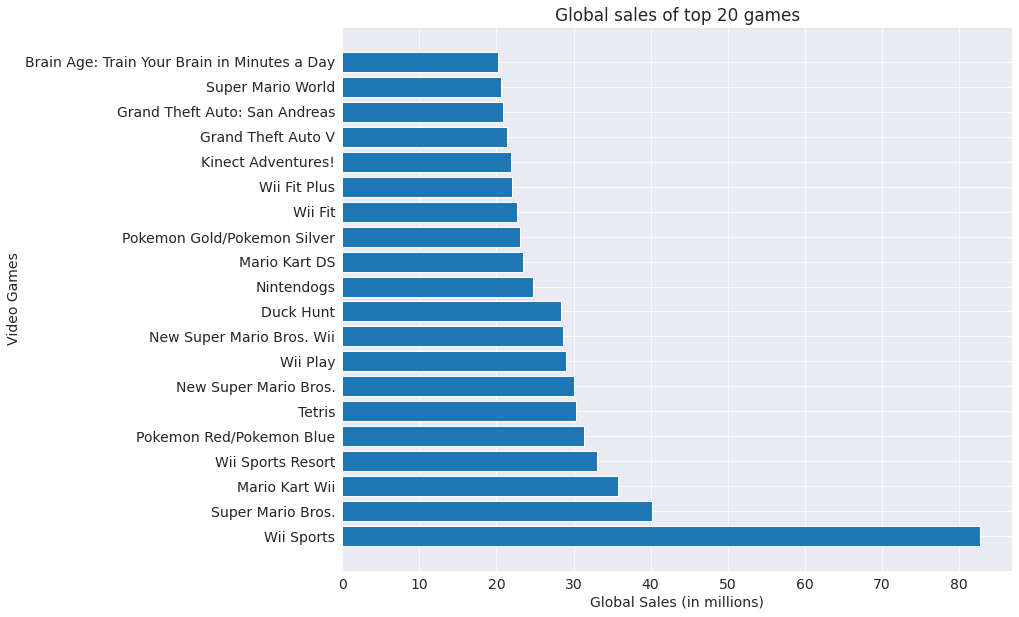

In [18]:
top_games_df = games_df.sort_values('Global_Sales', ascending=False).head(20)
plt.figure(figsize=(12,10))
plt.barh(top_games_df.Name, top_games_df.Global_Sales)
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Video Games')
plt.title('Global sales of top 20 games')

It seems the almost all except one game among the top 20 have sold between 20-40 million copies.<br> Wii sports is clearly the most popular game across the globe with more than double sales compared to the 2nd most popular game.

Let's now explore the top publishers of the most popular games.

In [19]:
top_games_df.Publisher.value_counts()

Nintendo                  17
Take-Two Interactive       2
Microsoft Game Studios     1
Name: Publisher, dtype: int64

<AxesSubplot:xlabel='Publisher', ylabel='count'>

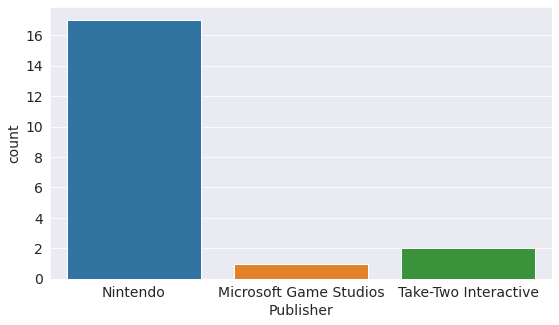

In [20]:
sns.countplot(x = top_games_df.Publisher)

Nintendo is the clear winner here with 85% of the top 20 games. Thus, it can be concluded that nintendo games are loved across the world and it's the most popular publisher among all.<br><br> Let's now see which type of games are the most popular.

In [21]:
genre_count = games_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].sum()
genre_count

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Genre,,,,
Action,877.83,525.00,159.95,1751.18
Adventure,105.80,64.13,52.07,239.04
Fighting,223.59,101.32,87.35,448.91
Misc,410.24,215.98,107.76,809.96
Platform,447.05,201.63,130.77,831.37
Puzzle,123.78,50.78,57.31,244.95
Racing,359.42,238.39,56.69,732.04
Role-Playing,327.28,188.06,352.31,927.37
Shooter,582.60,313.27,38.28,1037.37


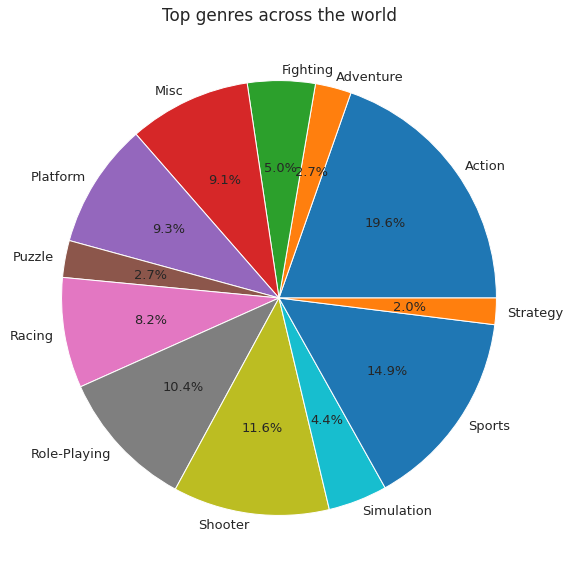

In [22]:
plt.figure(figsize=(12,10))
plt.pie(genre_count.Global_Sales, labels = genre_count.index, autopct='%1.1f%%', textprops = {"fontsize":13},labeldistance = 1.05)
plt.title('Top genres across the world')
plt.show()

Action and Sports are two of the most popular genres of video games based on the global sales.<br>
- Action games make up almost 20% of the total global sales while the sports games constitute ~15% of the same.
- Shooter and Role-playing games are also gaining popularity with ~12% and ~10% of the global sales.

Let's now see some year on year statistics and how the trend has changed across the past few decades.

Text(0.5, 1.0, 'Yearly games count')

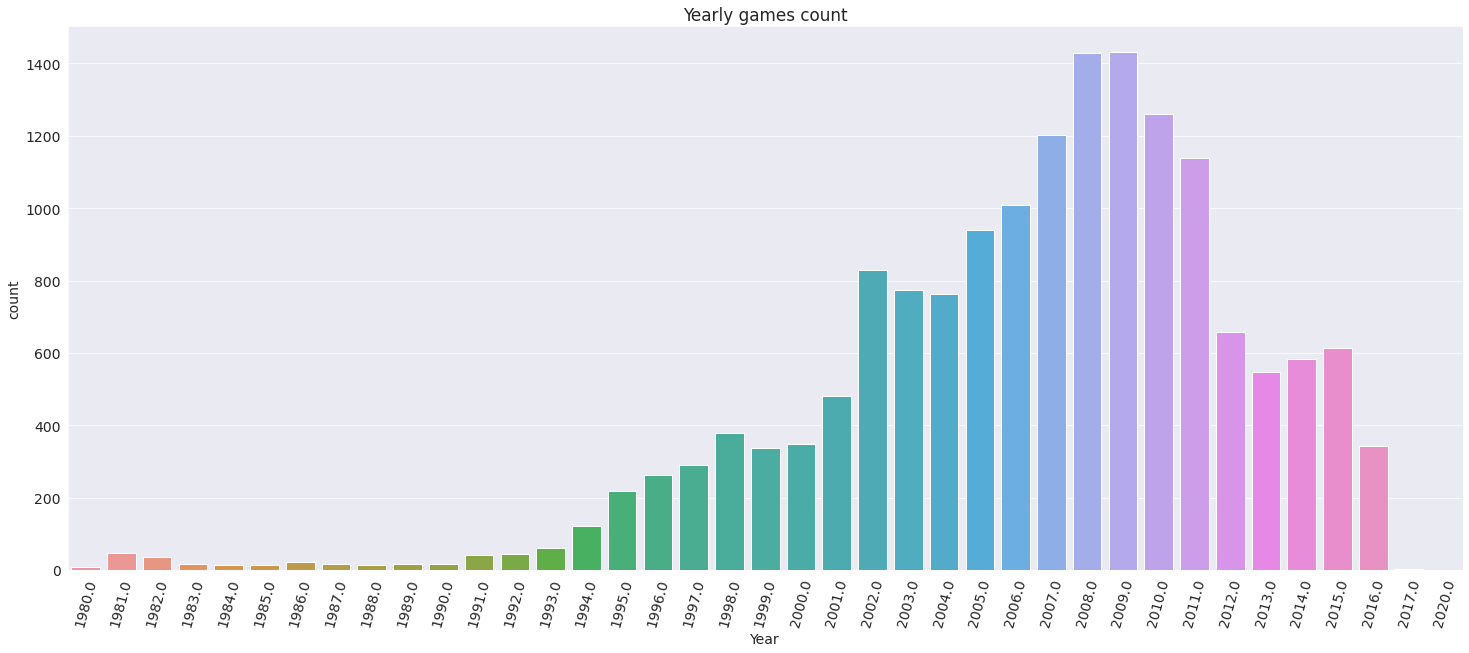

In [23]:
plt.figure(figsize = (25,10))
sns.countplot(x = games_df.Year)
plt.xticks(rotation = 75)
plt.title("Yearly games count")

It is observed that the gaming industry has seen a sudden boost in the 21st century with almost a 70% growth in the number of games created in 2002 as compared to 2001.<br>
2007-2011 were the years with the maximum number of games created and consequently we have seen that many of the world's most popular games were created during these 4-5 years.

Let us now understand some regional distributions of video game sales.

In [24]:
games_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [25]:
NA_Sales = top_games_df['NA_Sales']
EU_Sales = top_games_df['EU_Sales']
JP_Sales = top_games_df['JP_Sales']
Other_Sales = top_games_df['Other_Sales']

In [26]:
NA_Sales

Rank
1     41.49
2     29.08
3     15.85
4     15.75
5     11.27
6     23.20
7     11.38
8     14.03
9     14.59
10    26.93
11     9.07
12     9.81
13     9.00
14     8.94
15     9.09
16    14.97
17     7.01
18     9.43
19    12.78
20     4.75
Name: NA_Sales, dtype: float64

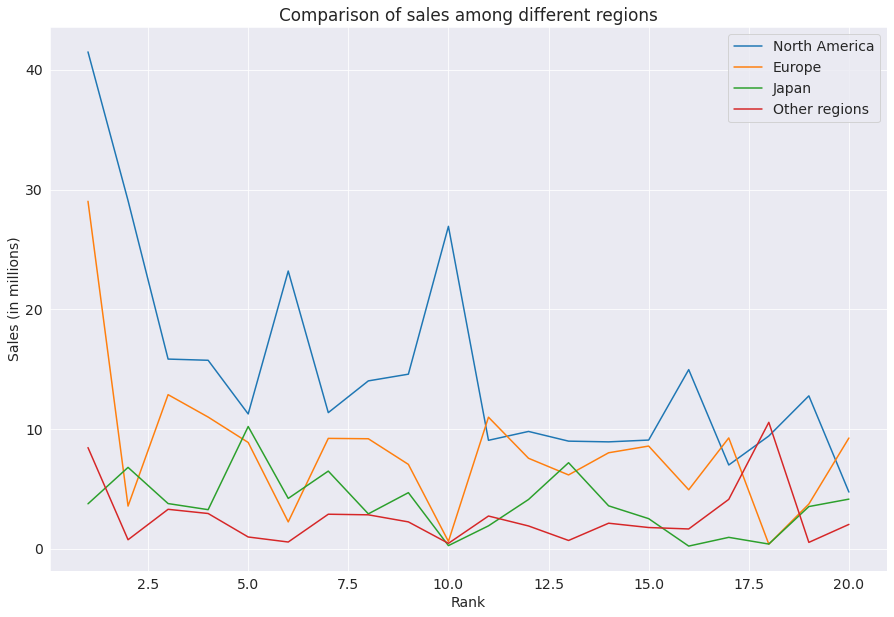

In [27]:
plt.figure(figsize=(15,10))
plt.title("Comparison of sales among different regions")
plt.plot(NA_Sales)
plt.plot(EU_Sales)
plt.plot(JP_Sales)
plt.plot(Other_Sales)
plt.xlabel("Rank")
plt.ylabel("Sales (in millions)")
plt.legend(['North America', 'Europe', 'Japan', 'Other regions'])

Following points can be concluded from this plot:
- The distribution in all of the regions is completely random for the top 20 games of all time however, excluding Japan, a pattern can be seen in the fact that in all other regions, there is an abrupt drop in the sales of 3rd and above ranked games as compared to the top 2 games.
- It clearly indicates that the people of all regions except Japan have loved the same games.
- An interesting trend noted is in the Japanese Region where the trend doesn't show any clear winner game which could be said as the most popular game in Japan. However, 5th ranked game has been the most popular with more than 10 million sales.

Let's see what could be the reason for Japan's inconsistent trend.

In [28]:
top_games_df[:5]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


These are the top 5 ranked games and from the list itself it's clear why Japan has the most sales for Pokemon video game.<br>
Pokemon is a popular Japanese anime created by Nintendo along with some Japanese studios. This is the reason it is the most popular video game in Japan.

Let's view the top 10 gaming platforms

In [29]:
platforms = games_df.Platform.value_counts().head(10)
platforms

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: Platform, dtype: int64

Let's visualise this using a bar chart.

Text(0.5, 1.0, 'Most popular gaming platforms')

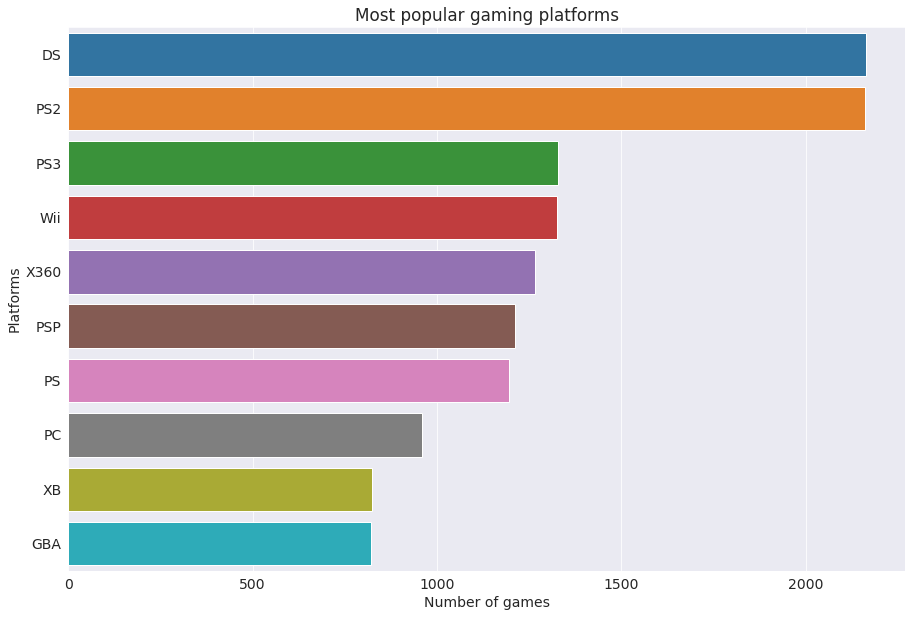

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(y = platforms.index, x = platforms)
plt.ylabel("Platforms")
plt.xlabel("Number of games")
plt.title("Most popular gaming platforms")

Among all the gaming platforms, Ds and PS2 are the most popular platforms with each supporting more than 2100 games. PS3 and Wii, being comparatively new, are also catching up with ~1300 games each.

Let us save and upload our work to Jovian before continuing

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankit1821/video-games-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankit1821/video-games-sales-analysis


'https://jovian.ai/ankit1821/video-games-sales-analysis'

## Asking and Answering Questions

We've already gained several insights about the video game sales by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.



### Q1: Compare the global sales of the first 2 decades of the 21st century?

Let's see the global sales trend for the top 20 games each decade.

In [33]:
decade1 = games_df[(games_df.Year > 2000) & (games_df.Year < 2011)].head(20)
decade2 = games_df[(games_df.Year > 2010) & (games_df.Year < 2021)].head(20)

In [34]:
decade1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72


In [35]:
decade2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
43,Mario Kart 7,3DS,2011.0,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21


A quick insight we get from looking at the two tables is the fact that out of the top 32 popular games of all time, 20 games were created between 2001-2010.<br> This insight itself displays the fact that the first decade of 21st century witnessed the creation of a large number of worldwide popular video games.

Let's see the average global sales in both the decades.

In [36]:
avg1 = decade1.Global_Sales.mean()
avg1

25.278000000000002

In [37]:
avg2 = decade2.Global_Sales.mean()
avg2

12.2715

Lets' visualise this information using plots.

Text(0.5, 1.0, 'Global sales during 20011-2020')

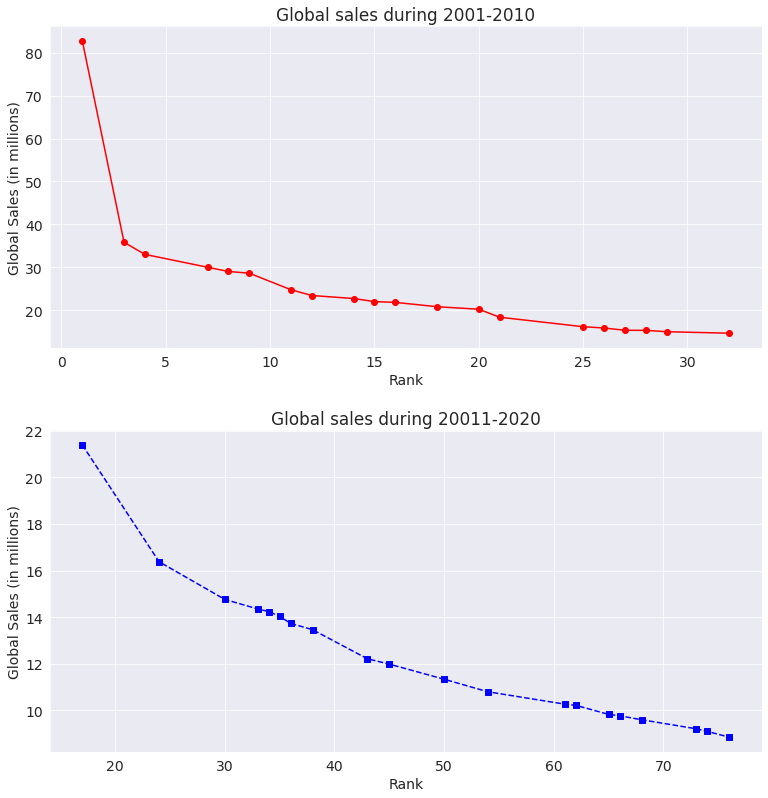

In [38]:
fig, axes = plt.subplots(2,1, figsize = (12,12))
plt.tight_layout(pad=4)

#first plot
axes[0].plot(decade1.Global_Sales, "o-r")
axes[0].set_xlabel("Rank")
axes[0].set_ylabel("Global Sales (in millions)")
axes[0].set_title("Global sales during 2001-2010")

#second plot
axes[1].plot(decade2.Global_Sales, "s--b")
axes[1].set_xlabel("Rank")
axes[1].set_ylabel("Global Sales (in millions)")
axes[1].set_title("Global sales during 20011-2020")

Following conclusions can be made:
- It is clear that more popular games were created in the first decade as compared to second decade.
- Highest sale in the first decade crossed more than 80 million, while the second decade witnessed highest sale of just about 22 million.
- Average global sales in the second decade is half the average sales in the first decade.<br><br>
It can be clearly seen that the first decade was a boon for the gaming industry. A possible reason for this boon could be the extremely better graphics of games as compared to earlier games.

### Q2: What is the most popular genre in North America?

In [39]:
games_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [40]:
NA_genre = games_df.groupby("Genre")[['NA_Sales']].sum()
NA_genre

,NA_Sales
Genre,
Action,877.83
Adventure,105.80
Fighting,223.59
Misc,410.24
Platform,447.05
Puzzle,123.78
Racing,359.42
Role-Playing,327.28
Shooter,582.60


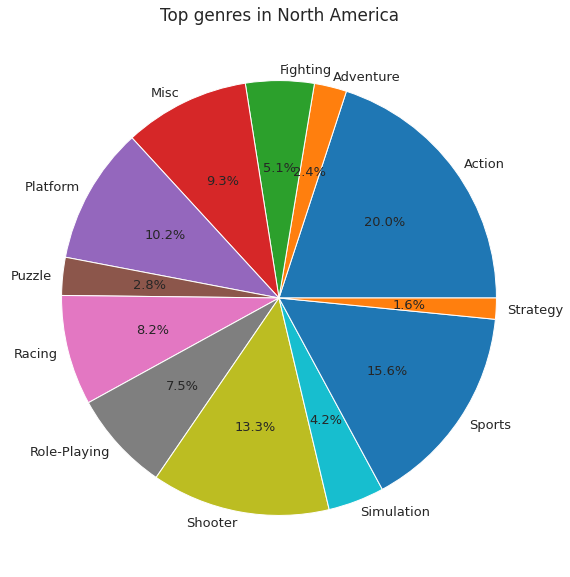

In [41]:
plt.figure(figsize=(12,10))
plt.pie(NA_genre.NA_Sales, labels = NA_genre.index, autopct='%1.1f%%', textprops = {"fontsize":13},labeldistance = 1.05)
plt.title('Top genres in North America')
plt.show()

From the pie chart, it is clear that:
- Action and Sports are two of the most popular genres in North America.
- Shooter and Simulation are also popular and constitute about 13% and 10% of the total_Sales respectively.

### Q3: Compare the overall most popular genres in Europe vs the most popular genres in the last decade.

In [42]:
EU_genre = games_df.groupby("Genre")[['EU_Sales']].sum()
EU_genre

,EU_Sales
Genre,
Action,525.00
Adventure,64.13
Fighting,101.32
Misc,215.98
Platform,201.63
Puzzle,50.78
Racing,238.39
Role-Playing,188.06
Shooter,313.27


These are the total europe sales for all the games created till now.<br><br> Let us now see the data for the games created in this last decade.

In [43]:
EU_lastdecade = games_df[games_df.Year > 2010]
EU_lastdecade

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
...,...,...,...,...,...,...,...,...,...,...
16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16581,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


Let's now see the total sales in Europe in the past decade for different genres.

In [44]:
EU_genre_lastdecade = EU_lastdecade.groupby("Genre")[['EU_Sales']].sum()
EU_genre_lastdecade

,EU_Sales
Genre,
Action,200.52
Adventure,13.85
Fighting,16.65
Misc,40.88
Platform,30.14
Puzzle,3.58
Racing,41.00
Role-Playing,60.06
Shooter,142.54


Lets visualize the information to get some insights into the data.

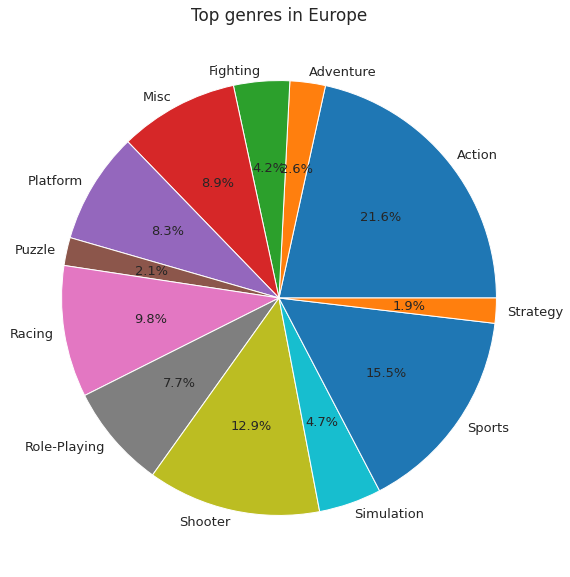

In [45]:
plt.figure(figsize=(12,10))
plt.pie(EU_genre.EU_Sales, labels = EU_genre.index, autopct='%1.1f%%', textprops = {"fontsize":13},labeldistance = 1.05)
plt.title('Top genres in Europe')
plt.show()

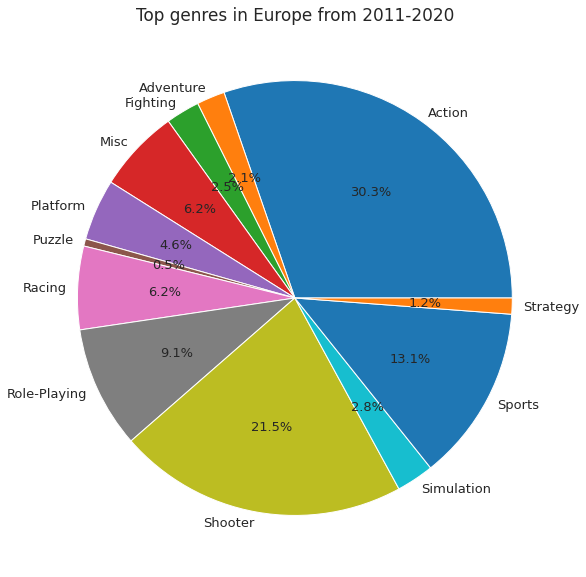

In [46]:
plt.figure(figsize=(12,10))
plt.pie(EU_genre_lastdecade.EU_Sales, labels = EU_genre_lastdecade.index, autopct='%1.1f%%', textprops = {"fontsize":13},labeldistance = 1.05)
plt.title('Top genres in Europe from 2011-2020')
plt.show()

Following conclusions can be made based on the two charts we have plotted:
- Action, Sports and Shooter games continue to be top 3 liked genres in Europe. So, game publishers should focus more on these genres to generate large profits.
- Shooter and action games have gained more popularity during this past decade constituting more than 50% of the total sales in Europe. This could be because a lot of good shooting action games such as PUBG, COD etc. were created in this decade.
- It should be noted that Racing, Platform and Misc. games have lost a considerable popularity in this past decade. So, publishers should be careful with these genres especially if there target market is Europe.

### Q4: What is the total sales of Nintendo games in Japan from 2001-2012 and also compare it with sales of other publishers?

In [47]:
games_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


First of all let's view the records from 2001-2012.

In [48]:
que_df = games_df[(games_df.Year > 2000) & (games_df.Year < 2013)]
que_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [59]:
jp_df = que_df.groupby('Publisher')[['JP_Sales']].sum()
nintendo_in_jp = jp_df.loc['Nintendo']
nintendo_in_jp

JP_Sales    234.66
Name: Nintendo, dtype: float64

So, Nintendo has sold almost 235 million copies of all it's games combined in Japan from 2001-2012.<br><br> Let us now compare all the publishers in Japan during the same time period.

In [61]:
jp_all_df = jp_df.sort_values('JP_Sales', ascending = False)
jp_all_df

,JP_Sales
Publisher,
Nintendo,234.66
Namco Bandai Games,66.03
Konami Digital Entertainment,48.07
Capcom,40.73
Square Enix,39.80
...,...
LEGO Media,0.00
LSP Games,0.00
Legacy Interactive,0.00


Let's visualize the top 10 publishers using plots.

In [63]:
jp_plot = jp_all_df.head(10)
jp_plot

,JP_Sales
Publisher,
Nintendo,234.66
Namco Bandai Games,66.03
Konami Digital Entertainment,48.07
Capcom,40.73
Square Enix,39.80
Sony Computer Entertainment,27.79
Sega,27.30
Tecmo Koei,17.57
Atari,10.68


Text(0.5, 1.0, 'Sales in Japan from 2001-2012')

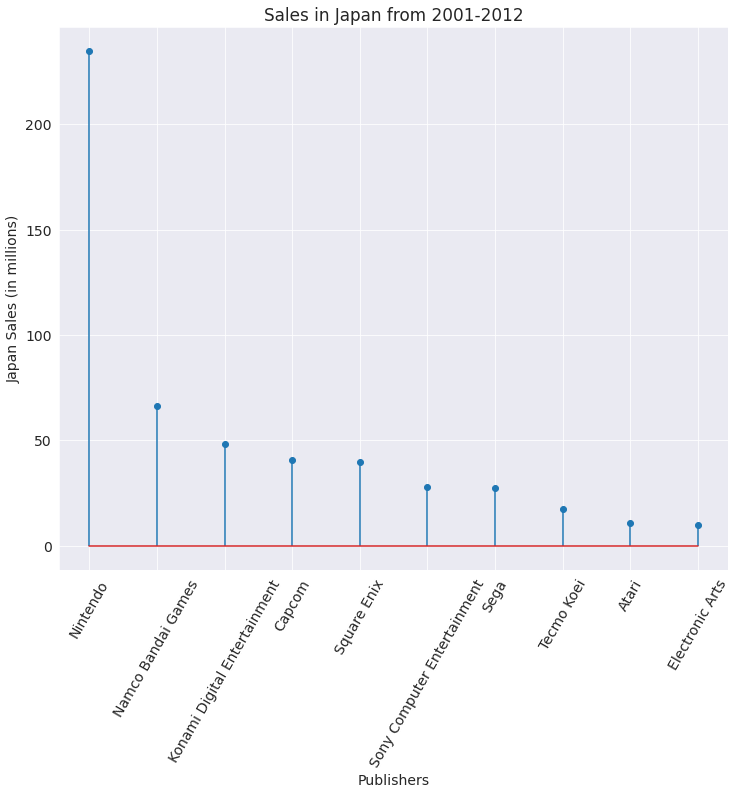

In [71]:
plt.figure(figsize = (12,10))
plt.stem(jp_plot.index, jp_plot.JP_Sales)
plt.xlabel('Publishers')
plt.xticks(rotation = 60)
plt.ylabel("Japan Sales (in millions)")
plt.title("Sales in Japan from 2001-2012")

It's clear that Nintendo has been the most popular video game publisher in Japan recently.

Let us save and upload our work to Jovian before continuing.

In [72]:
import jovian

In [73]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankit1821/video-games-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankit1821/video-games-sales-analysis


'https://jovian.ai/ankit1821/video-games-sales-analysis'

## Inferences and Conclusion

We've drawn many inferences from the survey. Here's a summary of a few of them:
- Wii sports has been the all-time most popular game considering the games created in the last 4 decades with global sales crossing more than 80 million. No other game created so far has been able to touch even half the sales of Wii sports.
- Nintendo has been the most popular game publisher worldwide with 85% of the top 20 games launched by them.
- Action and Sports are two of the most loved genres around the world. Role-playing and Shooting games are also gaining popularity. Most importantly, it's not the case that only 1 or 2 genres are being successful. Thus, it provides motivation to publishers to keep trying newer genres.
- 2007-2011 were the years with the maximum number of games created and consequently we have seen that many of the world's most popular games were created during these 4-5 years.
- Sales in all regions have shown a similar trend with wii sports beating all other games except in Japan. Pokemon, being a Japanese anime gained the most popularity in Japan and consequently the video game Pokemon Red/Pokemon Blue	has been the most successful video game in Japan.
- DS2 and PS2 are the most popular gaming platforms worldwide possibly because the other platforms are comparatively new.
- The first decade of the 21st century witnessed the creation of many famous games and it has been a dream decade for gamers as well as the gaming industry.
- Action and Sports are two of the most popular genres in North America. Shooter and Simulation are also popular and constitute about 13% and 10% of the total_Sales respectively
- Action, Sports and Shooter games continue to be top 3 liked genres in Europe. So, game publishers should focus more on these genres to generate large profits.
- Shooter and action games have gained more popularity during this past decade constituting more than 50% of the total sales in Europe. This could be because a lot of good shooting action games such as PUBG, COD etc. were created in this decade.
- It should be noted that Racing, Platform and Misc. games have lost a considerable popularity in this past decade. So, publishers should be careful with these genres especially if there target market is Europe.
- Nintendo has been the most popular video game publisher in Japan recently.

In [74]:
import jovian

In [75]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ankit1821/video-games-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ankit1821/video-games-sales-analysis


'https://jovian.ai/ankit1821/video-games-sales-analysis'

## References and Future Work

References:<br>
- [Pandas](https://pandas.pydata.org/)<br>
- [Matplotlib](https://matplotlib.org/)<br>
- [w3schools](https://www.w3schools.com/python/matplotlib_pyplot.asp)<br>
- [Seaborn](https://seaborn.pydata.org/)

Future Works includes :
- Implementing Machine Learning models.
- Prediction of the number of users by using the regression model.
- Exploring the correlation between various Trends like Mostly sold on basis of each Name, Genre, Publisher and also on particular date as well.

In [79]:
import jovian

In [ ]:
jovian.commit(file = ['vgsales.csv'])

<IPython.core.display.Javascript object>